<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day8_Document_Summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept**

Text summarization: Learning how to extract or generate concise versions of longer documents

**Project Scope**

Build a tool that can take a long article as input and produce a shorter summary that captures the key points

**Key Components**


*   Loading and preprocessing text data
*   Understanding extractive summarization techniques
*   Implementing a summarization algorithm


*   Evaluating summary quality







**Set Up Your Environment**

In [26]:
# Install required libraries
!pip install nltk sumy newspaper3k

# Download required NLTK data
import nltk
import nltk

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Import Libraries**

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
!pip install lxml[html_clean]
import newspaper
from newspaper import Article
import pandas as pd
import matplotlib.pyplot as plt

**Create Functions for Summarization**

In [28]:
def summarize_textrank(text, sentences_count=5, language="english"):
    """
    Summarize text using the TextRank algorithm
    """
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    summarizer = TextRankSummarizer()
    summary = summarizer(parser.document, sentences_count)
    return " ".join(str(sentence) for sentence in summary)

def summarize_lexrank(text, sentences_count=5, language="english"):
    """
    Summarize text using the LexRank algorithm
    """
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    summarizer = LexRankSummarizer()
    summary = summarizer(parser.document, sentences_count)
    return " ".join(str(sentence) for sentence in summary)

def summarize_lsa(text, sentences_count=5, language="english"):
    """
    Summarize text using Latent Semantic Analysis
    """
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count)
    return " ".join(str(sentence) for sentence in summary)

**Create a Function to Fetch Articles from URLs**

In [29]:
def get_article_from_url(url):
    """
    Fetch and parse an article from a URL
    """
    article = Article(url)
    article.download()
    article.parse()
    return {
        'title': article.title,
        'text': article.text,
        'authors': article.authors,
        'publish_date': article.publish_date,
        'top_image': article.top_image
    }

**Create a Function to Compare Original and Summary**

In [30]:
def compare_text_lengths(original_text, summary):
    """
    Compare the lengths of original text and summary
    """
    original_sentences = sent_tokenize(original_text)
    summary_sentences = sent_tokenize(summary)

    original_word_count = len(original_text.split())
    summary_word_count = len(summary.split())

    reduction_percentage = ((original_word_count - summary_word_count) / original_word_count) * 100

    comparison = {
        'original_sentences': len(original_sentences),
        'summary_sentences': len(summary_sentences),
        'original_words': original_word_count,
        'summary_words': summary_word_count,
        'reduction_percentage': reduction_percentage
    }

    return comparison

**Create a Function to Visualize the Comparison**

In [31]:
def visualize_comparison(comparison):
    """
    Create a visualization comparing original text and summary
    """
    # Create a bar chart
    labels = ['Original', 'Summary']
    word_counts = [comparison['original_words'], comparison['summary_words']]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, word_counts, color=['blue', 'green'])
    plt.title('Text Length Comparison: Original vs Summary')
    plt.ylabel('Word Count')
    for i, count in enumerate(word_counts):
        plt.text(i, count + 50, str(count), ha='center')

    plt.figtext(0.5, 0.01, f"Reduction: {comparison['reduction_percentage']:.2f}%",
                ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

    plt.show()

**Create the Main Interactive Function**

In [32]:
def document_summarizer():
    """
    Main function to interact with the document summarizer
    """
    print("=" * 50)
    print("DOCUMENT SUMMARIZER")
    print("=" * 50)

    source_type = input("Would you like to summarize text from a URL or paste text? (url/paste): ").lower()

    if source_type == 'url':
        url = input("\nEnter the URL of the article: ")
        try:
            article_data = get_article_from_url(url)
            text = article_data['text']
            print(f"\nTitle: {article_data['title']}")
            print(f"Authors: {', '.join(article_data['authors']) if article_data['authors'] else 'Unknown'}")
            print(f"Publish Date: {article_data['publish_date']}")
        except Exception as e:
            print(f"Error fetching article: {e}")
            return
    else:
        text = input("\nPaste your text here: ")

    # Choose algorithm
    print("\nChoose a summarization algorithm:")
    print("1. TextRank (focuses on most central sentences)")
    print("2. LexRank (similar to TextRank but uses different similarity measure)")
    print("3. LSA (Latent Semantic Analysis - uses semantics)")

    algo_choice = input("\nEnter your choice (1-3): ")

    # Get number of sentences
    try:
        sentences_count = int(input("\nHow many sentences should the summary contain? "))
    except ValueError:
        sentences_count = 5
        print("Invalid input. Using default of 5 sentences.")

    # Perform summarization
    if algo_choice == '1':
        summary = summarize_textrank(text, sentences_count)
        algo_name = "TextRank"
    elif algo_choice == '2':
        summary = summarize_lexrank(text, sentences_count)
        algo_name = "LexRank"
    elif algo_choice == '3':
        summary = summarize_lsa(text, sentences_count)
        algo_name = "LSA"
    else:
        summary = summarize_textrank(text, sentences_count)
        algo_name = "TextRank (default)"

    # Display results
    print("\n" + "=" * 50)
    print(f"SUMMARY USING {algo_name}:")
    print("=" * 50)
    print(summary)

    # Compare and visualize
    comparison = compare_text_lengths(text, summary)

    print("\n" + "=" * 50)
    print("SUMMARY STATISTICS:")
    print("=" * 50)
    print(f"Original Text: {comparison['original_words']} words, {comparison['original_sentences']} sentences")
    print(f"Summary: {comparison['summary_words']} words, {comparison['summary_sentences']} sentences")
    print(f"Reduction: {comparison['reduction_percentage']:.2f}%")

    visualize_comparison(comparison)

    return {
        'original_text': text,
        'summary': summary,
        'algorithm': algo_name,
        'comparison': comparison
    }

**Run Your Document Summarizer**

DOCUMENT SUMMARIZER
Would you like to summarize text from a URL or paste text? (url/paste): https://education.nationalgeographic.org/resource/food/

Paste your text here: Food is one of the basic necessities of life. Food contains nutrients—substances essential for the growth, repair, and maintenance of body tissues and for the regulation of vital processes. Nutrients provide the energy our bodies need to function.  The energy in food is measured in units called calories. Age, sex, weight, height, and level of activity determine the number of calories a person needs each day. Depending on age, sex, and activity level, the recommended daily caloric intake for a child aged 11 to 14 can range anywhere from 1,600 to 2,600 calories per day, with sedentary girls needing the fewest calories and active boys needing the most. For adults, this can range from 1,800 to about 3,000.  Kinds of Nutrients  Scientists divide nutrients into six major groups: carbohydrates, fats, proteins, minerals, vita

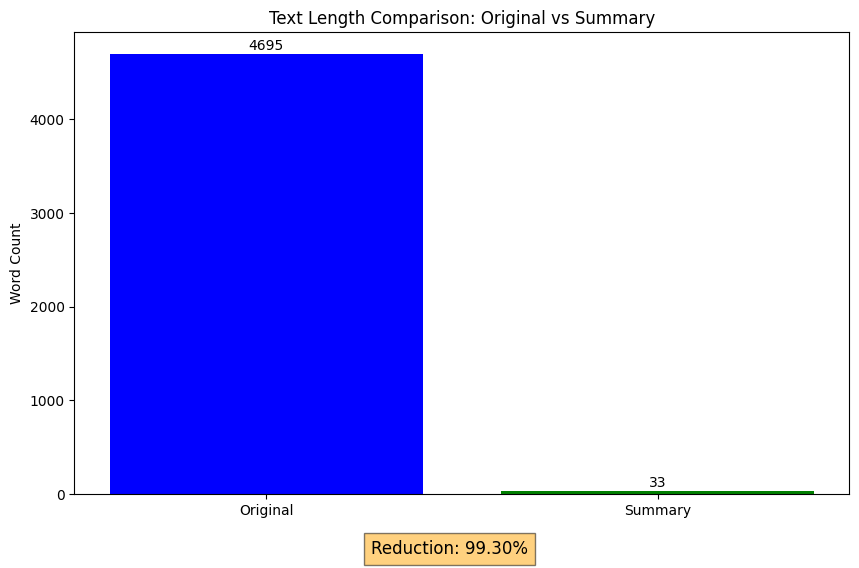

In [34]:
if __name__ == "__main__":
    results = document_summarizer()